In [3]:
import os

ROOT = "D:/Courses/Ineuron/DeepLearningANN_Sachin/Deep_Learning_Notes/CNN"
os.chdir(ROOT)

In [4]:
os.listdir()

['.ipynb_checkpoints',
 'car1.jpeg',
 'car_grayscale.jpeg',
 'Day-13_DL_FSDS.pdf',
 'Image understanding.ipynb']

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [6]:
car1 = mpimg.imread("car1.jpeg")

In [7]:
#RGB image
car1.shape

(168, 300, 3)

In [8]:
type(car1)

numpy.ndarray

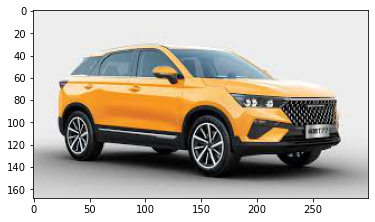

In [9]:
#plot the image
plt.imshow(car1)

In [10]:
#reading image using cv2
car1_cv2 = cv2.imread("car1.jpeg")

In [11]:
# cv2.imshow("image", car1_cv2) # DisabledFunctionError

In [73]:
# from google.colab.patches import cv2_imshow

# cv2_imshow(car1_cv2)

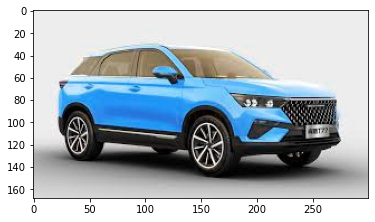

In [13]:
#  reading the image in matplotlib
plt.imshow(car1_cv2) # Problem: cv2 reads data as BGR and matplotlib read as RGB

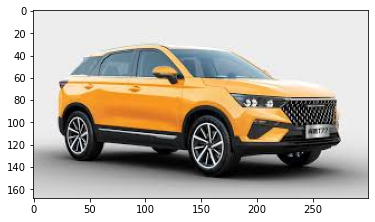

In [14]:
# solution to the above problem
car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

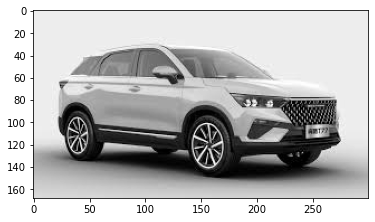

In [15]:
# convert to gray scale image
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap="gray")

In [16]:
car1_cv2_BGR_GRAY.shape

(168, 300)

In [17]:
car1_cv2_BGR_GRAY.min(), car1_cv2_BGR_GRAY.max() # min and max pixel intensity of entire pic in gray scale

(0, 255)

In [18]:
car1_cv2_BGR_GRAY[0,0] # pixel intensity of 0,0 pixel position

237

In [19]:
cv2.imwrite("car_grayscale.jpeg", car1_cv2_BGR_GRAY)

True

# Understanding composition of colored image

In [25]:
def visulize_RGB_channels(imgArray=None, fig_size=(10,7)):
    
    # splitting the RGB components
    B, G, R = cv2.split(imgArray)

    # create zero matrix with B img array shape
    Z = np.zeros(B.shape, dtype=B.dtype)

    # init subplots
    fig, ax = plt.subplots(2,2, figsize=fig_size)


    print("shape:", ax.shape)
    # to remove the axis in the plot
    [axi.set_axis_off() for axi in ax.ravel()]
    
    # 1st graph
    ax[0,0].set_title("original image")
    ax[0,0].imshow(cv2.merge((R,G,B)))
    
    # 2nd graph
    # make Blue and Green array zero for red image
    ax[0,1].set_title("red image")
    ax[0,1].imshow(cv2.merge((R,Z,Z)))

    ax[1,0].set_title("green image")
    ax[1,0].imshow(cv2.merge((Z,G,Z)))

    ax[1,1].set_title("blue image")
    ax[1,1].imshow(cv2.merge((Z,Z,B)))

shape: (2, 2)


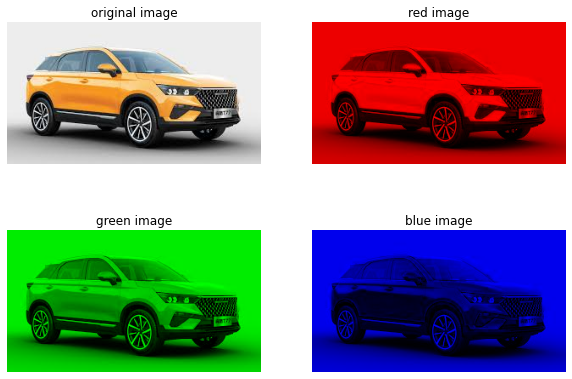

In [26]:
visulize_RGB_channels(imgArray=car1_cv2)

In [27]:
# create a random colored image of size 6*6*3
random_colored_image = np.random.randint(0, 255, (6,6,3))
random_colored_image.shape

(6, 6, 3)

shape: (2, 2)


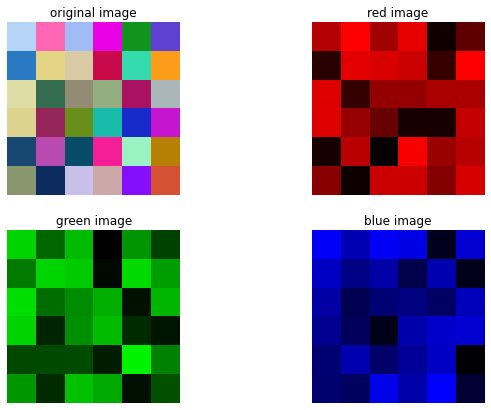

In [28]:
visulize_RGB_channels(imgArray=random_colored_image)

In [29]:
# BGR format
# see the 1st pixel value in the image array
random_colored_image[0,0,:]

array([247, 212, 181])

In [30]:
# see the last pixel value in the image array
random_colored_image[-1,-1,:]


array([ 52,  80, 214])

# Understanding filters

In [31]:
# sobel filter for edge detections

sobel = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
# this is like a vertical filter
print(sobel)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [32]:
# horizontal sobel filter
sobel.T

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [33]:
# understanding how filter works
# example array

example1 = [[0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],
            [0,0,0,255,255,255],]

example1 = np.array(example1)

In [34]:
# example array

example2 = [[255,255,255,0,0,0],
            [255,255,255,0,0,0],
            [255,255,255,0,0,0],
            [255,255,255,0,0,0],
            [255,255,255,0,0,0],
            [255,255,255,0,0,0],]

example2 = np.array(example2)

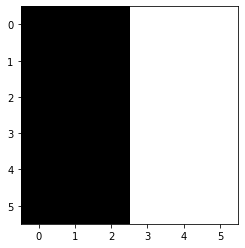

In [35]:
# 0s has black coor, 255s has white color
# there is only 1 edge at the center
plt.imshow(example1, cmap="gray")

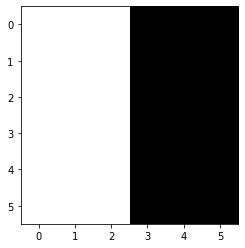

In [36]:
plt.imshow(example2, cmap="gray")


## applying sobel filter

In [42]:
def find_edges(imgFilter=None, picture=None):
    # extract row and col of input pic
    p_row, p_col = picture.shape # 

    k = imgFilter.shape[0] # k = 3

    temp = list() # to store final result

    stride = 1
    # resultant rows and col = ((((input size - filter size)) // stride) + 1)
    final_cols = (p_col - k)//stride  + 1
    final_rows = (p_row - k)//stride  + 1

    # take vertically down stride across row by row
    for v_stride in range(final_rows):
    # take horizontally right stride across col by col
        for h_stride in range(final_cols):
            target_area_of_pic = picture[v_stride: v_stride + k, h_stride: h_stride + k]
            #since it's a 2D matrix inner sum is column wise and outer sum is row. This way we'll get total sum of 2d array
            temp.append(sum(sum(imgFilter * target_area_of_pic)))
    
    return np.array(temp).reshape(final_rows, final_cols)

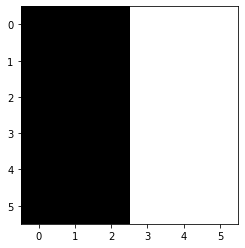

In [43]:
plt.imshow(example1, cmap="gray")


In [44]:
example1

array([[  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255]])

In [45]:
# column wise wise
sum(example1)

array([   0,    0,    0, 1530, 1530, 1530])

In [46]:
# sum of the above array
sum(sum(example1))

4590

In [47]:
# applying sobel filter 
result = find_edges(sobel, example1)
result

array([[    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0],
       [    0, -1020, -1020,     0]])

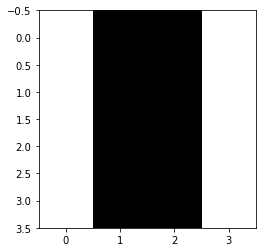

In [48]:
# the output shows that there is edge at the center
plt.imshow(result, cmap="gray")

In [49]:
# applying sobel filter 
result2 = find_edges(sobel, example2)
result2

array([[   0, 1020, 1020,    0],
       [   0, 1020, 1020,    0],
       [   0, 1020, 1020,    0],
       [   0, 1020, 1020,    0]])

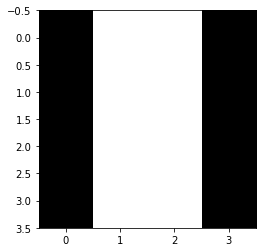

In [50]:
plt.imshow(result2, cmap="gray")

In [51]:
# applying sobel filter 
# if applying a horizontal filter. You get all 0 coz in example1 there's no horizontal lines
result_T = find_edges(sobel.T, example1)
result_T

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

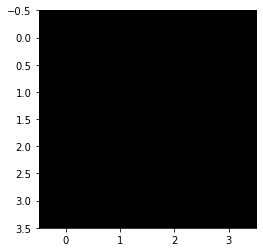

In [52]:
# the output says there's no edges. Hence all black
plt.imshow(result_T, cmap="gray")


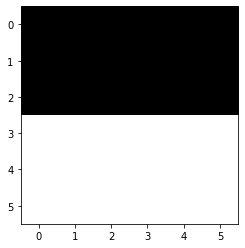

In [53]:
# taking transpose
example1_T = example1.T
plt.imshow(example1_T, cmap="gray")


In [54]:
# applying sobel filter 
result_T = find_edges(sobel.T, example1_T)
result_T

array([[    0,     0,     0,     0],
       [-1020, -1020, -1020, -1020],
       [-1020, -1020, -1020, -1020],
       [    0,     0,     0,     0]])

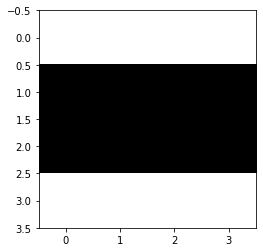

In [55]:
# the output shows that it found horizontal edge of example1_T
plt.imshow(result_T, cmap="gray")


In [56]:
result_T = find_edges(sobel, example1_T)
result_T

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

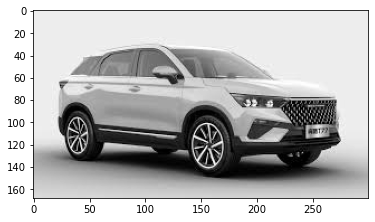

In [57]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap="gray")

In [58]:
# applying sobel filter on grayscale car image
result_car = find_edges(sobel, car1_cv2_BGR_GRAY)
result_car

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

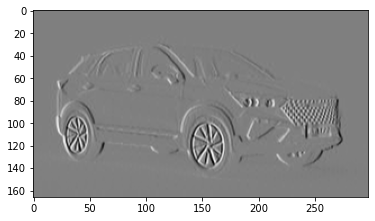

In [59]:
# vertical edges are more dominating
plt.imshow(result_car, cmap="gray")

In [60]:
# applying horizontal sobel filter
result_car = find_edges(sobel.T, car1_cv2_BGR_GRAY)
result_car

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [-12, -12, -12, ..., -16, -16, -16],
       [-12, -12, -12, ..., -16, -16, -16],
       [ -4,  -4,  -4, ..., -12, -12, -12]])

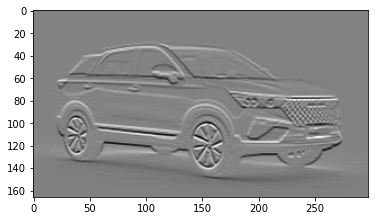

In [61]:
# horizontal edges are more dominating
plt.imshow(result_car, cmap="gray")

In [ ]:
# so cnn tries to learn different edge like vertical, horixontal, disgonal etc

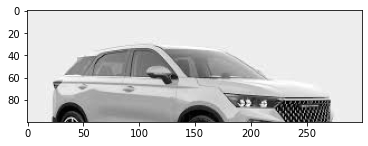

In [62]:
# crop
plt.imshow(car1_cv2_BGR_GRAY[0:100, 0:300], cmap="gray")

Text(0.5, 0.98, 'testing')

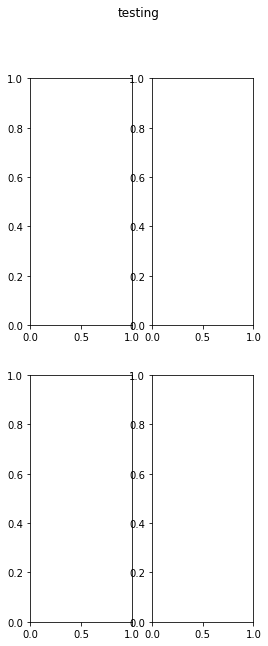

In [63]:
fig, ax = plt.subplots(2,2, figsize=(4,10))
fig.suptitle("testing")

In [64]:
type(fig)

matplotlib.figure.Figure

In [65]:
# fig.

In [66]:
ones = np.ones((3,3))
ones

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

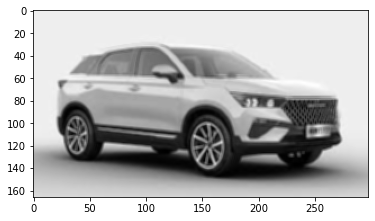

In [67]:
result_car = find_edges(ones, car1_cv2_BGR_GRAY)
# blur
plt.imshow(result_car, cmap="gray")

In [68]:
# example array

example1 = [[0,0,0,0,255,255,255,255,0,0,0,0,],
            [0,0,0,0,255,255,255,255,0,0,0,0,],
            [0,0,0,0,255,255,255,255,0,0,0,0,],
            [0,0,0,0,255,255,255,255,0,0,0,0,],
            [0,0,0,0,255,255,255,255,255,255,255,255],
            [0,0,0,0,255,255,255,255,255,255,255,255],
            [0,0,0,0,255,255,255,255,255,255,255,255],
            [0,0,0,0,255,255,255,255,0,0,0,0,],
            [0,0,0,0,255,255,255,255,0,0,0,0,],
            [0,0,0,0,255,255,255,255,0,0,0,0,],
            [0,0,0,0,255,255,255,255,0,0,0,0,],
            [0,0,0,0,255,255,255,255,0,0,0,0,],
            ]

example1 = np.array(example1)

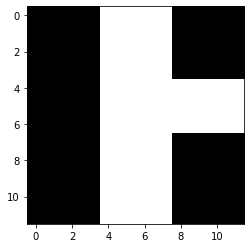

In [69]:
# example1_T = example1.T
plt.imshow(example1, cmap="gray")


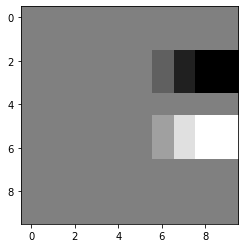

In [70]:
result = find_edges(sobel.T, example1)
plt.imshow(result, cmap="gray")

In [71]:
result.shape

(10, 10)

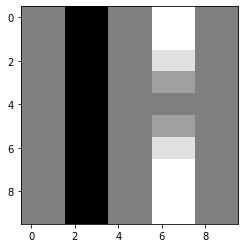

In [72]:
result = find_edges(sobel, example1)
plt.imshow(result, cmap="gray")